In [83]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [84]:
df = pd.read_csv('itineraries_sample_500.csv')

In [85]:
df['day_to_dep'] = pd.to_datetime(df['flightDate']) - pd.to_datetime(df['searchDate'])
df['day_to_dep'].head(50)

0     2 days
1     9 days
2     5 days
3     1 days
4     4 days
5     5 days
6     8 days
7     6 days
8     3 days
9    12 days
10    8 days
11   11 days
12    4 days
13    8 days
14   11 days
15    2 days
16    7 days
17    5 days
18    7 days
19   10 days
20    5 days
21    2 days
22    6 days
23   11 days
24    4 days
25    4 days
26    1 days
27    7 days
28    3 days
29    1 days
30    4 days
31    8 days
32    4 days
33    1 days
34    1 days
35    7 days
36    8 days
37    6 days
38    3 days
39    3 days
40    4 days
41   10 days
42   10 days
43    1 days
44    1 days
45    1 days
46   10 days
47    1 days
48    7 days
49    1 days
Name: day_to_dep, dtype: timedelta64[ns]

In [86]:
# Group by startingAirport, destinationAirport, and flightDate, and count the number of flights
top_flights = df.groupby(['startingAirport', 'destinationAirport', 'flightDate']).size().reset_index(name='flight_count')

# Sort by flight_count in descending order and get the top 10
top_flights = top_flights.sort_values(by='flight_count', ascending=False).head(10)

print(top_flights)

      startingAirport destinationAirport  flightDate  flight_count
32769             LGA                ORD  2022-09-13            47
1796              ATL                LAX  2022-08-30            47
27642             LAX                BOS  2022-08-21            46
32140             LGA                LAX  2022-09-21            44
29372             LAX                LGA  2022-09-13            44
29367             LAX                LGA  2022-09-08            44
27421             LAX                ATL  2022-08-12            44
29971             LAX                ORD  2022-08-09            43
1806              ATL                LAX  2022-09-09            43
30002             LAX                ORD  2022-09-09            42


In [87]:
# Group the dataframe by departure airport, arrival airport, and departure date
grouped = df.groupby(['startingAirport', 'destinationAirport'])

# Extract unique flight identifiers
unique_flights = list(grouped.groups.keys())  # List of (start_airport, dest_airport, dep_date) tuples

# Select 10 unique flights
selected_flights = unique_flights[:10]  # Modify this if you want a random selection

# List to store DataFrames
flight_price_changes = []

# Iterate through selected flights
for flight in selected_flights:
    # start_airport, dest_airport, dep_date = flight
    start_airport, dest_airport = flight
    
    # Get the corresponding DataFrame
    flight_df = grouped.get_group(flight).copy()
    
    # Sort by days to departure
    flight_df = flight_df.sort_values(by='day_to_dep')
    
    # Append to list
    flight_price_changes.append(flight_df)

# Print the first few rows of each DataFrame in the list
for i, flight_df in enumerate(flight_price_changes):
    print(f"Flight {i+1}:")
    print(flight_df.head(), "\n")

Flight 1:
                                   legId  searchDate  flightDate  \
265868  1b24e4d54f7c8d28063d298ed47e23f2  2022-08-04  2022-08-05   
372668  ce88de3ce7239c38c6dcfb0dc604ce7a  2022-09-09  2022-09-10   
380736  d17b007cc10e1369c8c784a50e74d956  2022-09-09  2022-09-10   
212001  e3e40b3b6af11d461414937372dc7366  2022-08-29  2022-08-30   
199297  4fbd160789722372f5d3c4c6da7e6cc9  2022-07-25  2022-07-26   

       startingAirport destinationAirport fareBasisCode travelDuration  \
265868             ATL                BOS      G0AIZNN1        PT6H59M   
372668             ATL                BOS      KA0NX0MC        PT2H36M   
380736             ATL                BOS      G0AJZNN1        PT6H52M   
212001             ATL                BOS      UA0NX0MQ       PT10H33M   
199297             ATL                BOS      G0AIZNN1        PT4H39M   

        elapsedDays  isBasicEconomy  isRefundable  ...  \
265868            0           False         False  ...   
372668            0 

[                                   legId  searchDate  flightDate  \
265868  1b24e4d54f7c8d28063d298ed47e23f2  2022-08-04  2022-08-05   
372668  ce88de3ce7239c38c6dcfb0dc604ce7a  2022-09-09  2022-09-10   
380736  d17b007cc10e1369c8c784a50e74d956  2022-09-09  2022-09-10   
212001  e3e40b3b6af11d461414937372dc7366  2022-08-29  2022-08-30   
199297  4fbd160789722372f5d3c4c6da7e6cc9  2022-07-25  2022-07-26   
...                                  ...         ...         ...   
134716  05826df8e1a76da9d53924bfe6f7d1bc  2022-05-09  2022-07-08   
315495  9f464b3cb2e1d5e178790c959053091d  2022-07-19  2022-09-17   
396178  d37f66af664108c7d51bcab3c081d798  2022-07-27  2022-09-25   
126977  280db079ba41fd6252bab00bdd103818  2022-05-21  2022-07-20   
220178  69b78fdc48060a0cb7b75080d07e64a0  2022-06-10  2022-08-09   

       startingAirport destinationAirport fareBasisCode travelDuration  \
265868             ATL                BOS      G0AIZNN1        PT6H59M   
372668             ATL            

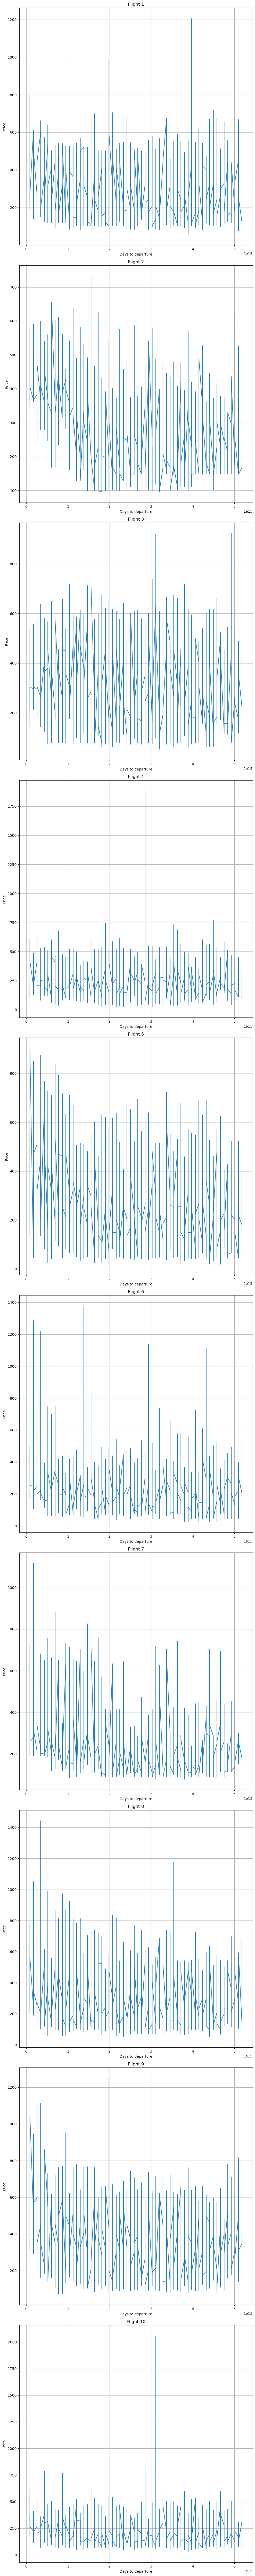

In [88]:
print(flight_price_changes)
size = len(flight_price_changes)

# Plot the price changes for each flight
fig, axs = plt.subplots(size, 1, figsize=(10, 10*size))

for i, flight_df in enumerate(flight_price_changes):
    axs[i].plot(flight_df['day_to_dep'], flight_df['totalFare'])
    axs[i].set_title(f"Flight {i+1}")
    axs[i].set_xlabel('Days to departure')
    axs[i].set_ylabel('Price')
    axs[i].grid()

plt.tight_layout()
plt.show()

In [89]:
# Perform mean fill for flight 1
flight_price_changes[0]['totalFare'] = flight_price_changes[0]['totalFare'].fillna(flight_price_changes[0]['totalFare'].mean())

# Print the first few rows to verify
print(flight_price_changes[0].head())

                                   legId  searchDate  flightDate  \
265868  1b24e4d54f7c8d28063d298ed47e23f2  2022-08-04  2022-08-05   
372668  ce88de3ce7239c38c6dcfb0dc604ce7a  2022-09-09  2022-09-10   
380736  d17b007cc10e1369c8c784a50e74d956  2022-09-09  2022-09-10   
212001  e3e40b3b6af11d461414937372dc7366  2022-08-29  2022-08-30   
199297  4fbd160789722372f5d3c4c6da7e6cc9  2022-07-25  2022-07-26   

       startingAirport destinationAirport fareBasisCode travelDuration  \
265868             ATL                BOS      G0AIZNN1        PT6H59M   
372668             ATL                BOS      KA0NX0MC        PT2H36M   
380736             ATL                BOS      G0AJZNN1        PT6H52M   
212001             ATL                BOS      UA0NX0MQ       PT10H33M   
199297             ATL                BOS      G0AIZNN1        PT4H39M   

        elapsedDays  isBasicEconomy  isRefundable  ...  \
265868            0           False         False  ...   
372668            0           

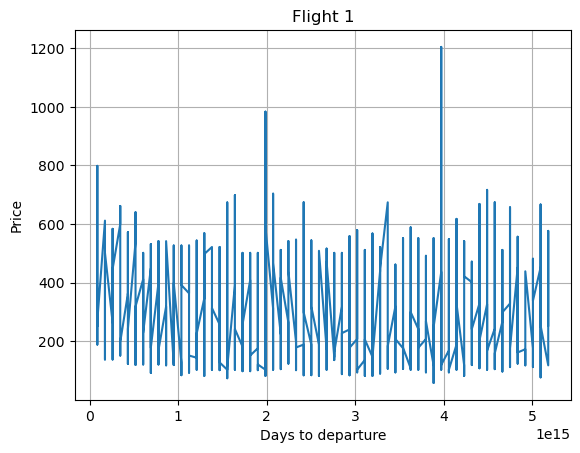

In [90]:
plt.plot(flight_price_changes[0]['day_to_dep'], flight_price_changes[0]['totalFare'])
plt.title('Flight 1')
plt.xlabel('Days to departure')
plt.ylabel('Price')
plt.grid()
plt.show()

In [91]:
# Check for missing prices in flight 1
missing_prices = flight_price_changes[0][flight_price_changes[0]['totalFare'].isnull()]

#Print number of missing prices
print("Number of missing prices in flight 1: " + str(len(missing_prices)))


Number of missing prices in flight 1: 0


In [92]:
# Perform mean fill for flight 2 to 10
for i in range(1, 10):
    flight_price_changes[i]['totalFare'] = flight_price_changes[i]['totalFare'].fillna(flight_price_changes[i]['totalFare'].mean())

# Check for missing prices in flights 2 to 10
missing_prices = pd.concat([flight_price_changes[i][flight_price_changes[i]['totalFare'].isnull()] for i in range(1, 10)])

#Print number of missing prices
print("Number of missing prices in flights 2 to 10: " + str(len(missing_prices)))

Number of missing prices in flights 2 to 10: 0


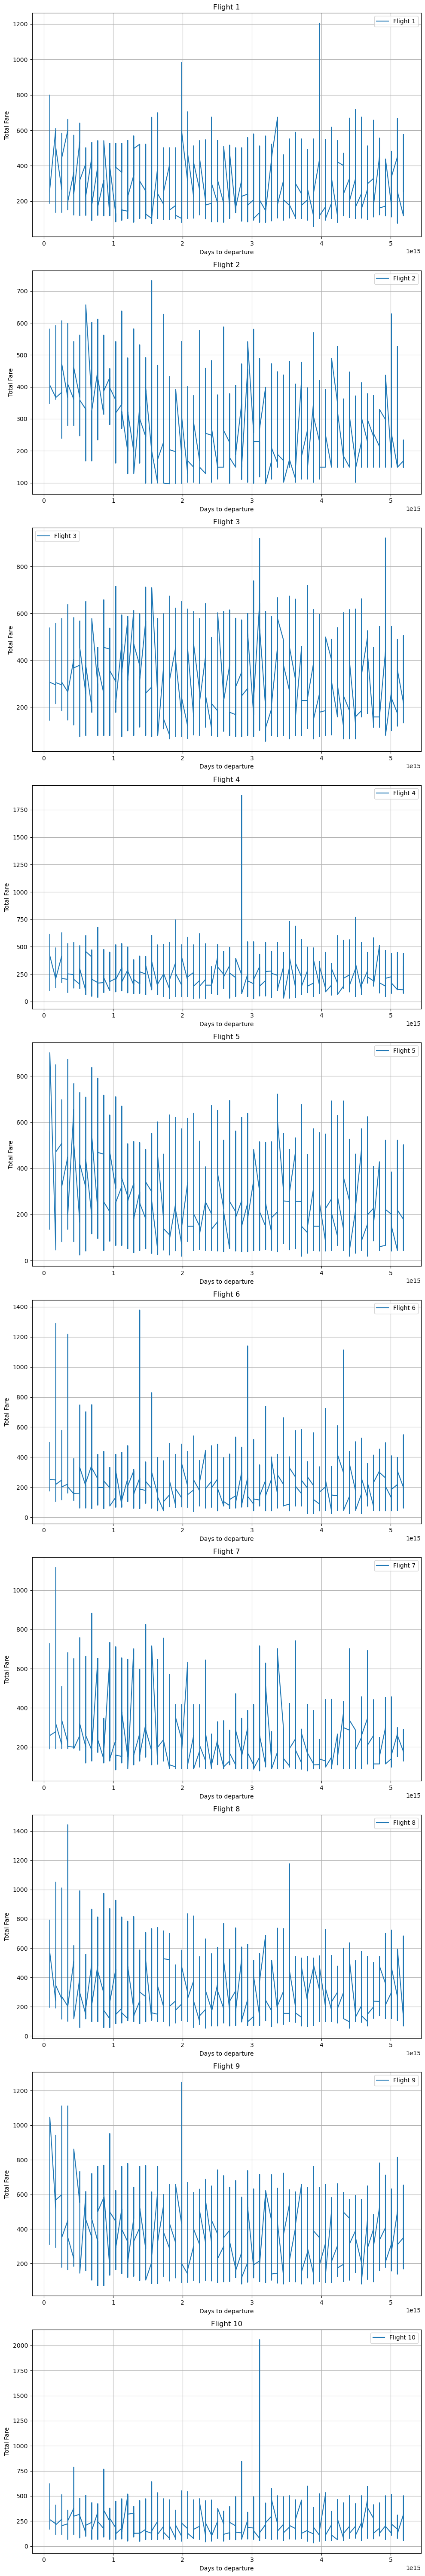

In [93]:
fig, axs = plt.subplots(size, 1, figsize=(10, 6*size))

for i, flight_df in enumerate(flight_price_changes):
    axs[i].plot(flight_df['day_to_dep'], flight_df['totalFare'], label=f'Flight {i+1}')
    axs[i].set_xlabel('Days to departure')
    axs[i].set_ylabel('Total Fare')
    axs[i].set_title(f'Flight {i+1}')
    axs[i].legend()
    axs[i].grid()

plt.tight_layout()
plt.show()

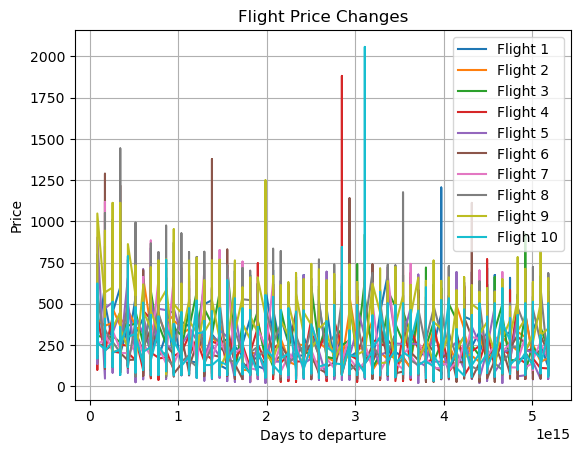

In [94]:
#Flight price changes for each flight
for i, flight_df in enumerate(flight_price_changes):
    plt.plot(flight_df['day_to_dep'], flight_df['totalFare'], label=f'Flight {i+1}')

plt.title('Flight Price Changes')
plt.xlabel('Days to departure')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

In [95]:
shapes = [df.shape for df in flight_price_changes]
print(shapes)

[(2996, 29), (1418, 29), (1867, 29), (1752, 29), (2310, 29), (1857, 29), (898, 29), (1836, 29), (4330, 29), (2926, 29)]


In [96]:
# Define the columns to keep
columns_to_keep = ['startingAirport', 'destinationAirport', 'totalFare', 'day_to_dep', 'flightDate']

# Update each DataFrame in the flight_price_changes list
flight_price_changes = [df[columns_to_keep] for df in flight_price_changes]

# Print the first few rows of each updated DataFrame to verify
for i, flight_df in enumerate(flight_price_changes):
    print(f"Flight {i+1}:")
    print(flight_df.head(), "\n")

Flight 1:
       startingAirport destinationAirport  totalFare day_to_dep  flightDate
265868             ATL                BOS     252.10     1 days  2022-08-05
372668             ATL                BOS     318.60     1 days  2022-09-10
380736             ATL                BOS     277.60     1 days  2022-09-10
212001             ATL                BOS     364.19     1 days  2022-08-30
199297             ATL                BOS     253.60     1 days  2022-07-26 

Flight 2:
       startingAirport destinationAirport  totalFare day_to_dep  flightDate
21058              ATL                CLT      408.6     1 days  2022-05-25
17599              ATL                CLT      408.6     1 days  2022-05-09
8204               ATL                CLT      417.6     1 days  2022-05-01
139881             ATL                CLT      453.6     1 days  2022-07-02
48333              ATL                CLT      417.6     1 days  2022-05-01 

Flight 3:
       startingAirport destinationAirport  totalFare d

In [97]:
# List to store the 10 DataFrames
route_dataframes = []

for route in top_flights[['startingAirport', 'destinationAirport']].values:
    start_airport, dest_airport = route
    route_df = df[(df['startingAirport'] == start_airport) & (df['destinationAirport'] == dest_airport)][['day_to_dep', 'totalFare']]
    
    # Sorting by days to departure
    route_df = route_df.sort_values(by='day_to_dep')
    
    route_dataframes.append(route_df)

print("First Route DataFrame:")
print(route_dataframes[0].head())

First Route DataFrame:
       day_to_dep  totalFare
446        1 days      176.6
14447      1 days      148.6
100130     1 days      260.6
13861      1 days      186.6
13811      1 days      195.6


In [98]:
route_dataframes.sort(key=lambda x: x.shape[0], reverse=True)
print("Sorted Route DataFrames:")
print(route_dataframes)

Sorted Route DataFrames:
[       day_to_dep  totalFare
149257     1 days     369.10
193393     1 days     370.60
239436     1 days     462.58
137123     1 days     598.60
134825     1 days     390.61
...           ...        ...
354113    60 days     338.60
352341    60 days     390.70
304214    60 days     288.58
381729    60 days     215.20
211260    60 days     407.60

[4330 rows x 2 columns],        day_to_dep  totalFare
149257     1 days     369.10
193393     1 days     370.60
239436     1 days     462.58
137123     1 days     598.60
134825     1 days     390.61
...           ...        ...
354113    60 days     338.60
352341    60 days     390.70
304214    60 days     288.58
381729    60 days     215.20
211260    60 days     407.60

[4330 rows x 2 columns],        day_to_dep  totalFare
74652      1 days     395.60
400537     1 days     562.07
96244      1 days     663.10
106251     1 days     462.60
362394     1 days     389.61
...           ...        ...
351527    60 days     1

In [99]:
# Select the first route dataframe
route_df = route_dataframes[0]

# Count unique values in 'day_to_dep'
unique_days_count = route_df['day_to_dep'].value_counts()

# Add route information
route_info = f"Route: {route[0]} to {route[1]}"

# Calculate the average price for each unique day
average_price_per_day = route_df.groupby('day_to_dep')['totalFare'].mean()

# Calculate the average price by route
average_price_by_route = df.groupby(['startingAirport', 'destinationAirport'])['totalFare'].mean()

# Print the unique days count, route information, average price per day, and average price by route
print(route_info)
print("Unique days count:")
print(unique_days_count)
print("\nAverage price per day:")
print(average_price_per_day)
print("\nAverage price by route:")
print(average_price_by_route.loc[(route[0], route[1])])

Route: LAX to ORD
Unique days count:
day_to_dep
4 days     104
1 days      99
6 days      96
23 days     94
3 days      93
15 days     92
17 days     91
5 days      91
10 days     89
33 days     88
19 days     87
11 days     87
2 days      87
35 days     87
7 days      87
20 days     87
12 days     86
24 days     86
8 days      85
18 days     85
38 days     84
14 days     84
13 days     84
34 days     83
28 days     82
9 days      80
30 days     80
22 days     79
32 days     77
40 days     76
37 days     76
39 days     75
21 days     75
31 days     73
29 days     73
16 days     72
42 days     71
27 days     69
41 days     68
44 days     66
46 days     64
36 days     64
47 days     63
25 days     62
48 days     60
45 days     58
26 days     54
53 days     54
43 days     53
49 days     53
51 days     53
56 days     47
50 days     44
52 days     43
57 days     43
54 days     40
59 days     39
55 days     38
58 days     38
60 days     32
Name: count, dtype: int64

Average price per day:
da

In [100]:
from statsmodels.tsa.arima.model import ARIMA

# List to store ARIMA models
arima_models = []

# Use the route_df
flight_df = route_df.set_index('day_to_dep')
flight_df = flight_df.sort_index()

In [109]:
# List to store SARIMA models
sarima_models = []

# Iterate over the 10 flight DataFrames
for i, flight_df in enumerate(route_dataframes):
        # Ensure that 'totalFare' column exists and has sufficient data
        if flight_df['totalFare'].isna().sum() > 0:
            print(f"Skipping Flight {i+1} due to missing values in totalFare.")
            continue
        if len(flight_df) < 10:  # Ensure at least 10 data points for fitting
            print(f"Skipping Flight {i+1} due to insufficient data.")
            continue

        # Fitting the ARIMA model using auto_arima
        model = auto_arima(flight_df['totalFare'], seasonal=True, m=7, suppress_warnings=True)
        sarima_result = model.fit(flight_df['totalFare'])

        # Store the model
        sarima_models.append(sarima_result)

        # Summary output
        print(f"SARIMA Model for Flight {i+1}:")
        print(sarima_result.summary())
        print("\n")

SARIMA Model for Flight 1:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 4330
Model:               SARIMAX(5, 1, 0)   Log Likelihood              -27825.546
Date:                Wed, 19 Feb 2025   AIC                          55663.092
Time:                        09:10:03   BIC                          55701.330
Sample:                             0   HQIC                         55676.592
                               - 4330                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8576      0.015    -58.525      0.000      -0.886      -0.829
ar.L2         -0.6949      0.019    -37.171      0.000      -0.732      -0.658
ar.L3         -0.5108    

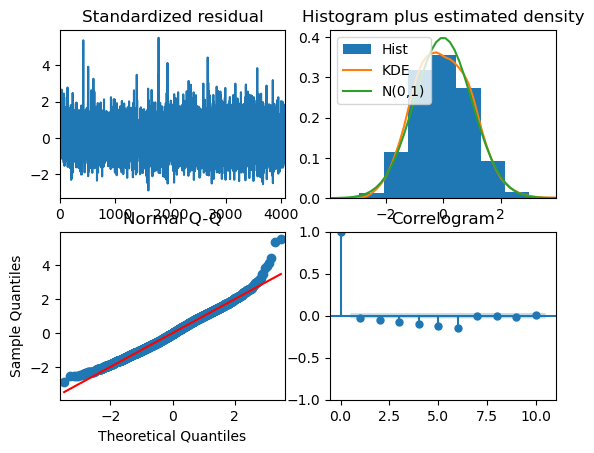

In [110]:
#Plot flight 5 SARIMA model
sarima_models[4].plot_diagnostics()
plt.show()

In [111]:
def plot_test(model, y_test, title):
    y_pred = model.predict(n_periods= len(y_test))
    plt.figure(figsize= (8,4))
    plt.plot(y_pred)
    plt.plot(y_test)
    plt.xlabel('Time Index', fontweight= 'bold')
    plt.ylabel('Temperature', fontweight= 'bold')
    plt.title(title, fontweight= 'bold', fontsize= 16)
    plt.show()

In [ ]:
# Fitting the ARIMA model with auto arima
model = auto_arima(flight_df['totalFare'], seasonal=True, m=7)
sarima_result = model.fit(flight_df['totalFare'])
	
arima_models.append(sarima_result)
	
# Summary
print(f"SARIMA Model for Flight {i+1}:")
print(sarima_result.summary())
print("\n")

SARIMA Model for Flight 10:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 4330
Model:               SARIMAX(5, 1, 0)   Log Likelihood              -27825.546
Date:                Wed, 19 Feb 2025   AIC                          55663.092
Time:                        09:01:14   BIC                          55701.330
Sample:                             0   HQIC                         55676.592
                               - 4330                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8576      0.015    -58.525      0.000      -0.886      -0.829
ar.L2         -0.6949      0.019    -37.171      0.000      -0.732      -0.658
ar.L3         -0.5108   

In [105]:
from pmdarima import auto_arima

# Fitting the ARIMA model with auto arima
model = auto_arima(flight_df['totalFare'], seasonal=False, m=7)
arima_result = model.fit(flight_df['totalFare'])
	
arima_models.append(arima_result)
	
# Summary
print(f"ARIMA Model for Flight {i+1}:")
print(arima_result.summary())
print("\n")

/opt/anaconda3/lib/python3.12/site-packages/pmdarima/arima/_validation.py:62: UserWarning: m (7) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


ARIMA Model for Flight 10:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 4330
Model:               SARIMAX(5, 1, 0)   Log Likelihood              -27825.546
Date:                Wed, 19 Feb 2025   AIC                          55663.092
Time:                        09:01:27   BIC                          55701.330
Sample:                             0   HQIC                         55676.592
                               - 4330                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8576      0.015    -58.525      0.000      -0.886      -0.829
ar.L2         -0.6949      0.019    -37.171      0.000      -0.732      -0.658
ar.L3         -0.5108    

In [112]:
# List to store ARIMA models
arima_models = []

# Iterate over each flight DataFrame
for i, flight_df in enumerate(route_dataframes):
        # Ensure 'totalFare' exists and has sufficient data
        if 'totalFare' not in flight_df.columns:
            print(f"Skipping Flight {i+1}: 'totalFare' column not found.")
            continue
        if flight_df['totalFare'].isna().sum() > 0:
            print(f"Skipping Flight {i+1}: Missing values in 'totalFare'.")
            continue
        if len(flight_df) < 10:  # Ensure enough data points for ARIMA fitting
            print(f"Skipping Flight {i+1}: Not enough data points.")
            continue

        # Fit the Auto-ARIMA model
        model = auto_arima(flight_df['totalFare'], seasonal=False, m=7, suppress_warnings=True)
        arima_result = model.fit(flight_df['totalFare'])

        # Store the model
        arima_models.append(arima_result)

        # Print Summary
        print(f"SARIMA Model for Flight {i+1}:")
        print(arima_result.summary())
        print("\n")

/opt/anaconda3/lib/python3.12/site-packages/pmdarima/arima/_validation.py:62: UserWarning: m (7) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


SARIMA Model for Flight 1:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 4330
Model:               SARIMAX(5, 1, 0)   Log Likelihood              -27825.546
Date:                Wed, 19 Feb 2025   AIC                          55663.092
Time:                        09:20:38   BIC                          55701.330
Sample:                             0   HQIC                         55676.592
                               - 4330                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8576      0.015    -58.525      0.000      -0.886      -0.829
ar.L2         -0.6949      0.019    -37.171      0.000      -0.732      -0.658
ar.L3         -0.5108    

/opt/anaconda3/lib/python3.12/site-packages/pmdarima/arima/_validation.py:62: UserWarning: m (7) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


SARIMA Model for Flight 2:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 4330
Model:               SARIMAX(5, 1, 0)   Log Likelihood              -27825.546
Date:                Wed, 19 Feb 2025   AIC                          55663.092
Time:                        09:20:44   BIC                          55701.330
Sample:                             0   HQIC                         55676.592
                               - 4330                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8576      0.015    -58.525      0.000      -0.886      -0.829
ar.L2         -0.6949      0.019    -37.171      0.000      -0.732      -0.658
ar.L3         -0.5108    

/opt/anaconda3/lib/python3.12/site-packages/pmdarima/arima/_validation.py:62: UserWarning: m (7) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


SARIMA Model for Flight 3:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 4140
Model:               SARIMAX(5, 0, 0)   Log Likelihood              -27078.613
Date:                Wed, 19 Feb 2025   AIC                          54171.226
Time:                        09:20:48   BIC                          54215.525
Sample:                             0   HQIC                         54186.901
                               - 4140                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    369.6903     13.242     27.918      0.000     343.736     395.645
ar.L1          0.0143      0.017      0.856      0.392      -0.018       0.047
ar.L2          0.0200    

/opt/anaconda3/lib/python3.12/site-packages/pmdarima/arima/_validation.py:62: UserWarning: m (7) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


SARIMA Model for Flight 4:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 4140
Model:               SARIMAX(5, 0, 0)   Log Likelihood              -27078.613
Date:                Wed, 19 Feb 2025   AIC                          54171.226
Time:                        09:20:52   BIC                          54215.525
Sample:                             0   HQIC                         54186.901
                               - 4140                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    369.6903     13.242     27.918      0.000     343.736     395.645
ar.L1          0.0143      0.017      0.856      0.392      -0.018       0.047
ar.L2          0.0200    

/opt/anaconda3/lib/python3.12/site-packages/pmdarima/arima/_validation.py:62: UserWarning: m (7) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


SARIMA Model for Flight 5:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 4079
Model:               SARIMAX(5, 1, 0)   Log Likelihood              -26353.055
Date:                Wed, 19 Feb 2025   AIC                          52718.110
Time:                        09:20:57   BIC                          52755.991
Sample:                             0   HQIC                         52731.525
                               - 4079                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8129      0.016    -52.442      0.000      -0.843      -0.783
ar.L2         -0.6558      0.019    -34.078      0.000      -0.694      -0.618
ar.L3         -0.4910    

/opt/anaconda3/lib/python3.12/site-packages/pmdarima/arima/_validation.py:62: UserWarning: m (7) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


SARIMA Model for Flight 6:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 4022
Model:                        SARIMAX   Log Likelihood              -26488.949
Date:                Wed, 19 Feb 2025   AIC                          52981.899
Time:                        09:21:01   BIC                          52994.498
Sample:                             0   HQIC                         52986.364
                               - 4022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    379.8742      3.206    118.488      0.000     373.591     386.158
sigma2      3.077e+04    235.848    130.447      0.000    3.03e+04    3.12e+04
Ljung-Box (L1) (Q):      

/opt/anaconda3/lib/python3.12/site-packages/pmdarima/arima/_validation.py:62: UserWarning: m (7) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


SARIMA Model for Flight 7:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3952
Model:               SARIMAX(5, 0, 0)   Log Likelihood              -26431.788
Date:                Wed, 19 Feb 2025   AIC                          52877.576
Time:                        09:21:05   BIC                          52921.550
Sample:                             0   HQIC                         52893.173
                               - 3952                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    368.6475     14.658     25.150      0.000     339.918     397.377
ar.L1          0.0564      0.010      5.835      0.000       0.037       0.075
ar.L2          0.0299    

/opt/anaconda3/lib/python3.12/site-packages/pmdarima/arima/_validation.py:62: UserWarning: m (7) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


SARIMA Model for Flight 8:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3771
Model:               SARIMAX(5, 1, 0)   Log Likelihood              -24579.693
Date:                Wed, 19 Feb 2025   AIC                          49171.386
Time:                        09:21:11   BIC                          49208.795
Sample:                             0   HQIC                         49184.687
                               - 3771                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8333      0.015    -54.742      0.000      -0.863      -0.803
ar.L2         -0.6891      0.018    -37.756      0.000      -0.725      -0.653
ar.L3         -0.5210    

/opt/anaconda3/lib/python3.12/site-packages/pmdarima/arima/_validation.py:62: UserWarning: m (7) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


SARIMA Model for Flight 9:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3771
Model:               SARIMAX(5, 1, 0)   Log Likelihood              -24579.693
Date:                Wed, 19 Feb 2025   AIC                          49171.386
Time:                        09:21:17   BIC                          49208.795
Sample:                             0   HQIC                         49184.687
                               - 3771                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8333      0.015    -54.742      0.000      -0.863      -0.803
ar.L2         -0.6891      0.018    -37.756      0.000      -0.725      -0.653
ar.L3         -0.5210    

/opt/anaconda3/lib/python3.12/site-packages/pmdarima/arima/_validation.py:62: UserWarning: m (7) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


SARIMA Model for Flight 10:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3355
Model:               SARIMAX(5, 1, 0)   Log Likelihood              -19287.469
Date:                Wed, 19 Feb 2025   AIC                          38586.938
Time:                        09:21:22   BIC                          38623.645
Sample:                             0   HQIC                         38600.067
                               - 3355                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8540      0.013    -67.624      0.000      -0.879      -0.829
ar.L2         -0.6797      0.016    -41.219      0.000      -0.712      -0.647
ar.L3         -0.5446   

In [113]:
#Prophet model prediction
from prophet import Prophet

In [118]:
print (flight_df.head())

      ds       y
0 1 days  369.10
1 1 days  370.60
2 1 days  462.58
3 1 days  598.60
4 1 days  390.61


In [122]:
# List to store Prophet models
prophet_models = []

# Iterate over each flight DataFrame
for i, flight_df in enumerate(route_dataframes):
        # Ensure 'totalFare' exists and has sufficient data
        if 'totalFare' not in flight_df.columns:
            print(f"Skipping Flight {i+1}: 'totalFare' column not found.")
            continue
        if flight_df['totalFare'].isna().sum() > 0:
            print(f"Skipping Flight {i+1}: Missing values in 'totalFare'.")
            continue
        if len(flight_df) < 10:  # Ensure enough data points for Prophet fitting
            print(f"Skipping Flight {i+1}: Not enough data points.")
            continue

        # Prepare the DataFrame for Prophet
        flight_df = flight_df.reset_index()[['day_to_dep', 'totalFare']]
        flight_df.columns = ['ds', 'y']
        start_date = pd.Timestamp("2022-06-01")
        flight_df['ds'] = start_date + flight_df['ds']

        # Fit the Prophet model
        model = Prophet()
        model.fit(flight_df)

        # Store the model
        prophet_models.append(model)

        # Print Summary
        print(f"Prophet Model for Flight {i+1} fitted.")


09:32:17 - cmdstanpy - INFO - Chain [1] start processing
09:32:17 - cmdstanpy - INFO - Chain [1] done processing
09:32:18 - cmdstanpy - INFO - Chain [1] start processing
09:32:18 - cmdstanpy - INFO - Chain [1] done processing
09:32:18 - cmdstanpy - INFO - Chain [1] start processing


Prophet Model for Flight 1 fitted.
Prophet Model for Flight 2 fitted.


09:32:18 - cmdstanpy - INFO - Chain [1] done processing
09:32:18 - cmdstanpy - INFO - Chain [1] start processing
09:32:18 - cmdstanpy - INFO - Chain [1] done processing
09:32:18 - cmdstanpy - INFO - Chain [1] start processing


Prophet Model for Flight 3 fitted.
Prophet Model for Flight 4 fitted.


09:32:18 - cmdstanpy - INFO - Chain [1] done processing
09:32:18 - cmdstanpy - INFO - Chain [1] start processing
09:32:18 - cmdstanpy - INFO - Chain [1] done processing


Prophet Model for Flight 5 fitted.


09:32:18 - cmdstanpy - INFO - Chain [1] start processing
09:32:18 - cmdstanpy - INFO - Chain [1] done processing
09:32:18 - cmdstanpy - INFO - Chain [1] start processing


Prophet Model for Flight 6 fitted.
Prophet Model for Flight 7 fitted.


09:32:19 - cmdstanpy - INFO - Chain [1] done processing
09:32:19 - cmdstanpy - INFO - Chain [1] start processing
09:32:19 - cmdstanpy - INFO - Chain [1] done processing
09:32:19 - cmdstanpy - INFO - Chain [1] start processing


Prophet Model for Flight 8 fitted.
Prophet Model for Flight 9 fitted.


09:32:19 - cmdstanpy - INFO - Chain [1] done processing


Prophet Model for Flight 10 fitted.


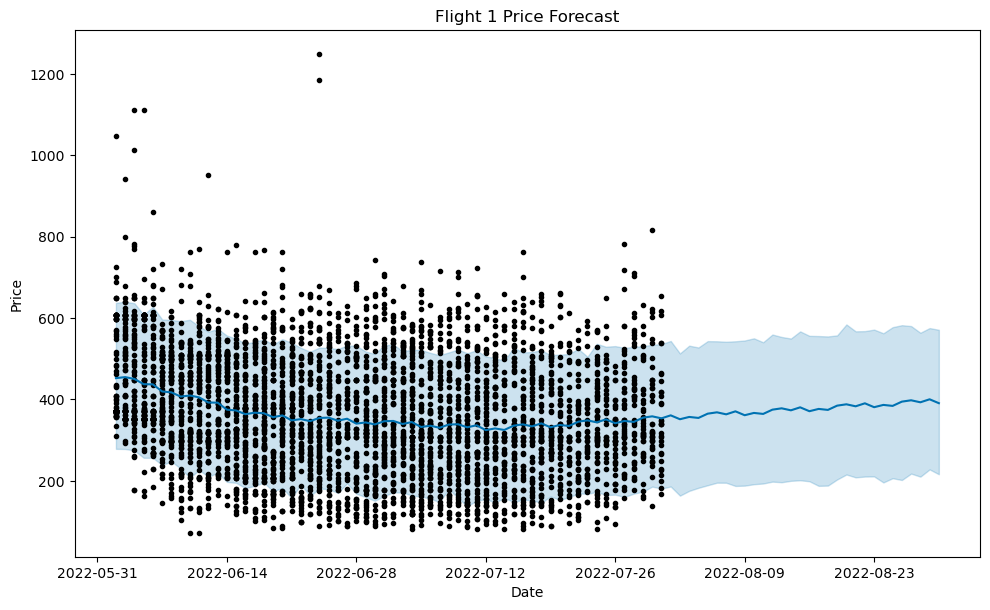

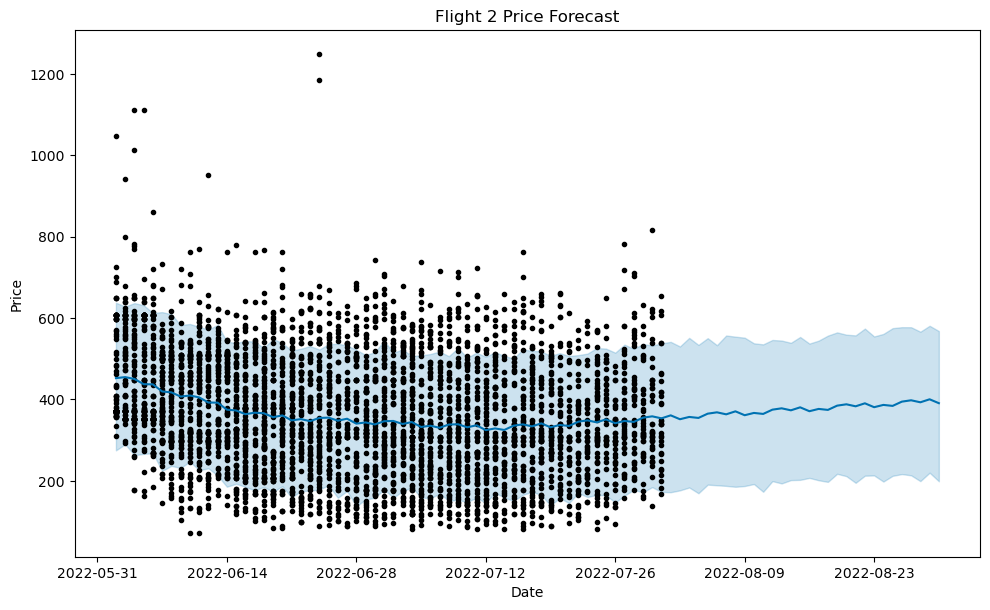

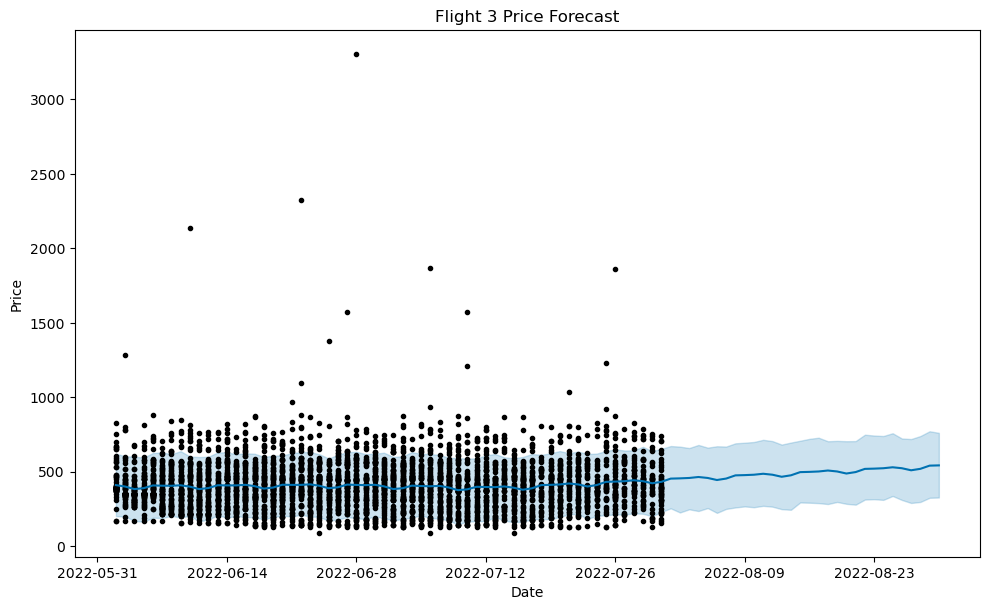

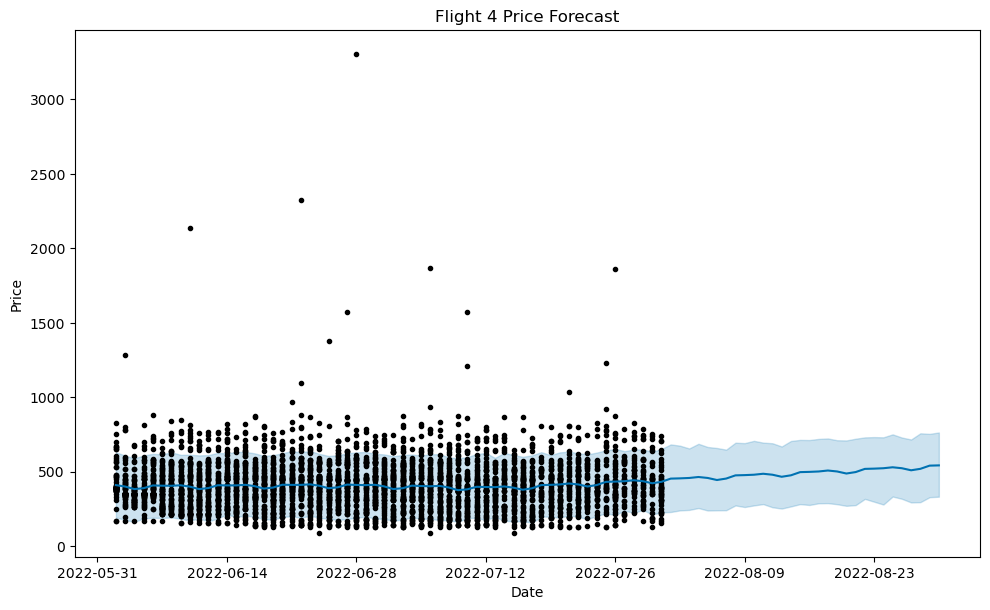

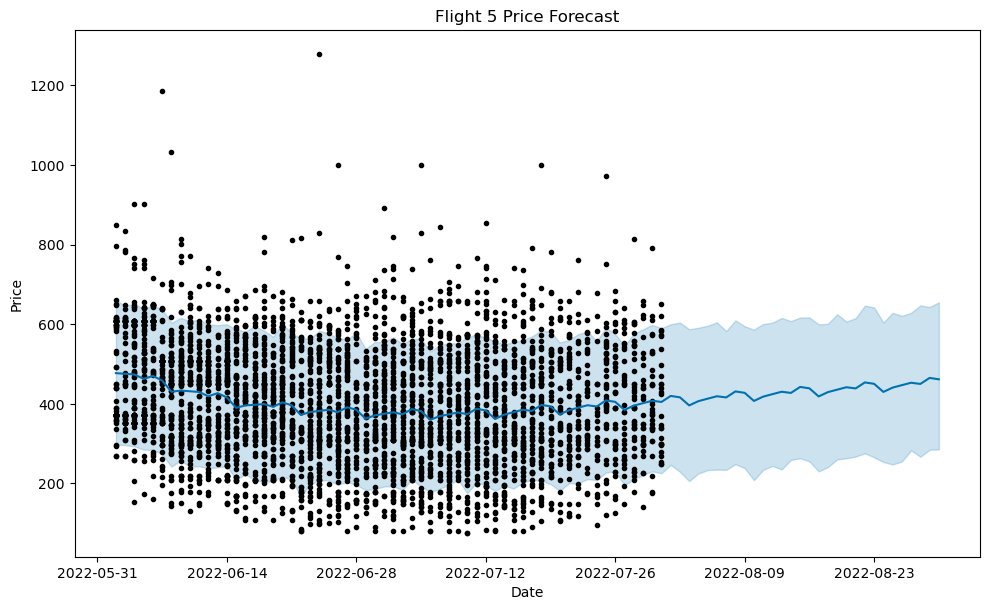

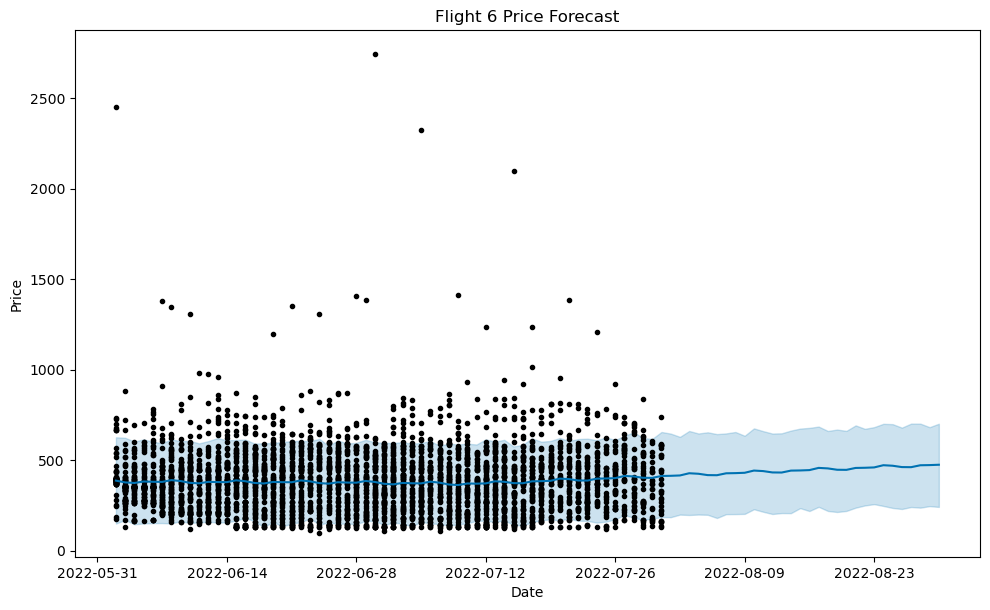

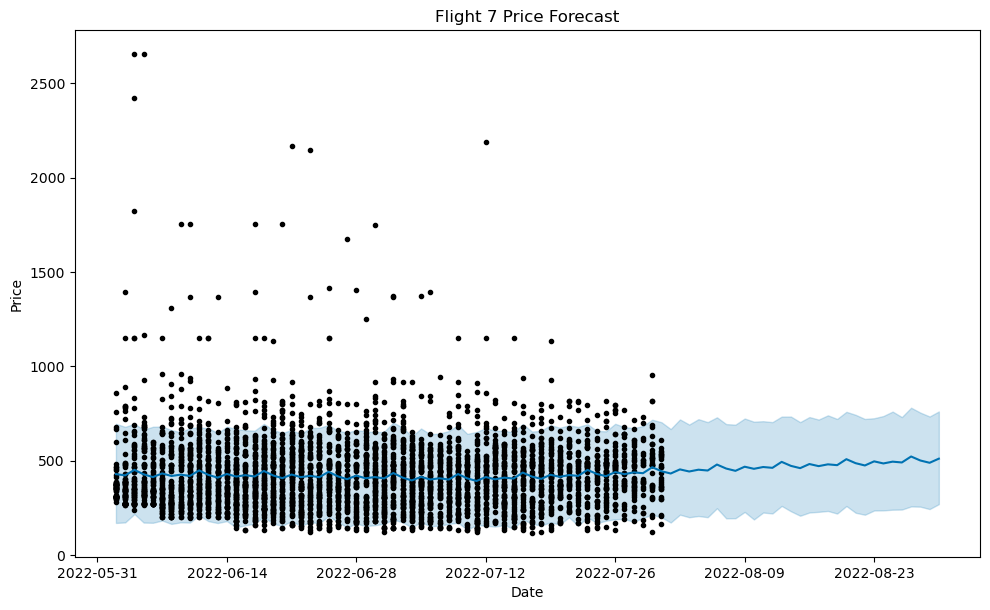

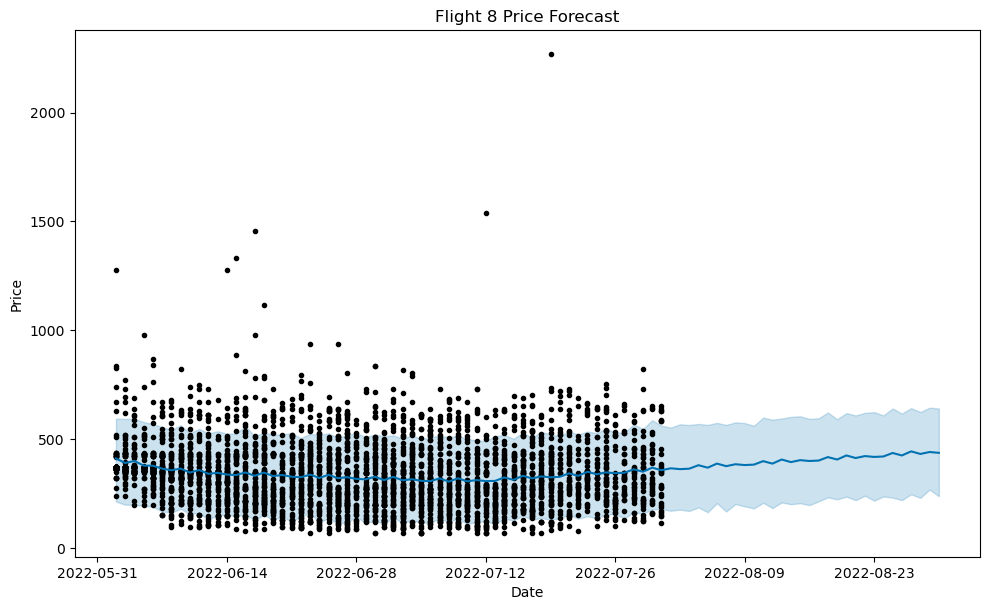

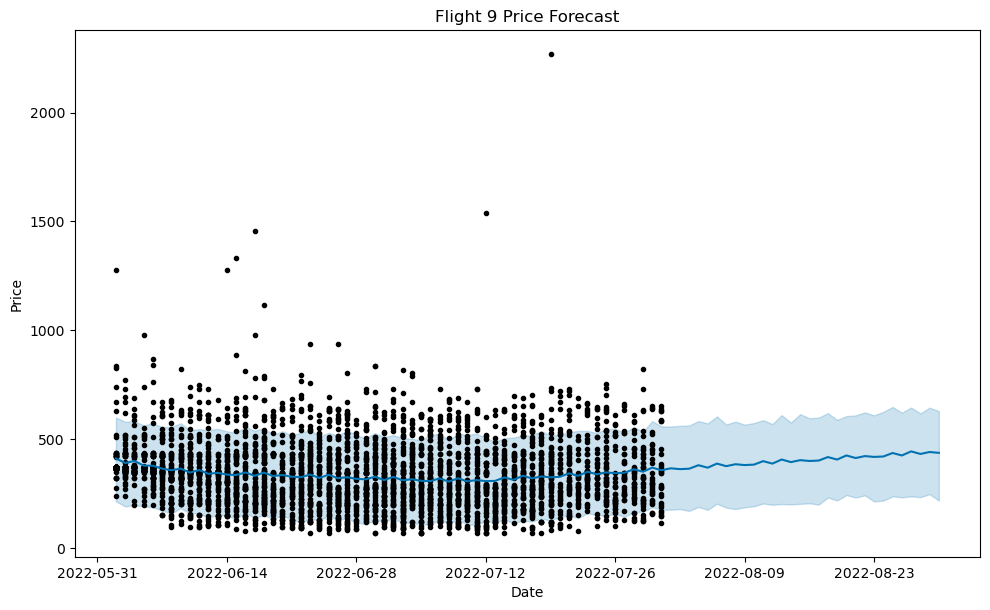

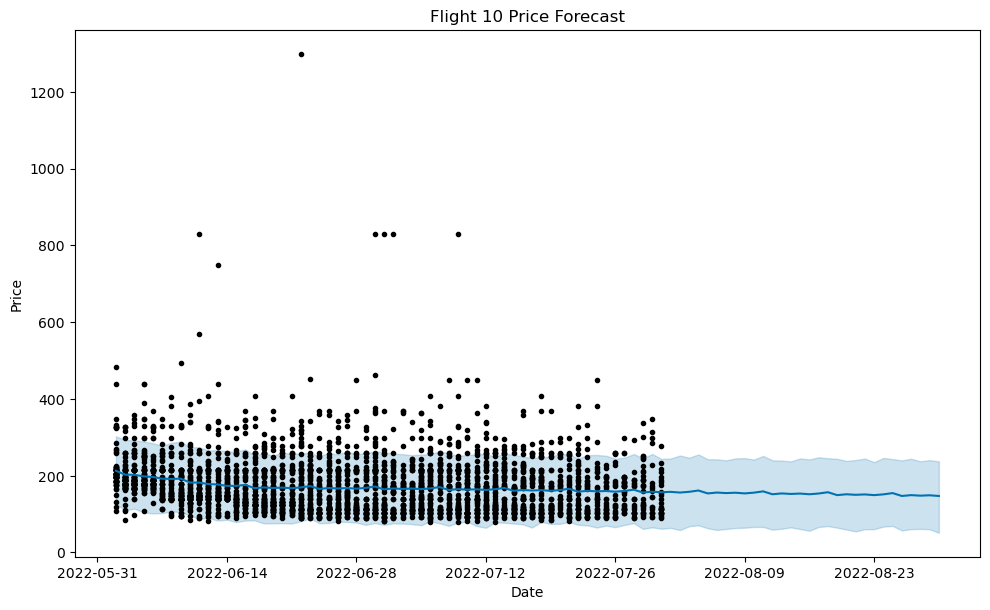

In [123]:
#Forcast the price for every flight
for i, model in enumerate(prophet_models):
    future = model.make_future_dataframe(periods=30)
    forecast = model.predict(future)
    model.plot(forecast)
    plt.title(f"Flight {i+1} Price Forecast")
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.grid()
    plt.show()

# List to store the 10 DataFrames
route_dataframes = []

for route in top_flights[['startingAirport', 'destinationAirport']].values:
    start_airport, dest_airport = route
    route_df = df[(df['startingAirport'] == start_airport) & (df['destinationAirport'] == dest_airport)][['day_to_dep', 'totalFare']]
    
    # Sorting by days to departure
    route_df = route_df.sort_values(by='day_to_dep')
    
    route_dataframes.append(route_df)